In [1]:
import tensorflow as tf
import numpy as np
import random
import pandas as pd
import pickle
from pickle  import load
import sklearn
from sklearn import preprocessing
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from mlxtend.regressor import StackingCVRegressor
from sklearn.linear_model import Lasso
from sklearn.neighbors import RadiusNeighborsRegressor
from xgboost import XGBRegressor
import time
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from pickle import load
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from pickle import load

In [2]:
"""
----loading data----
"""

data = pd.read_pickle(r'C:\Users\hamed\Desktop\Research\Paper\Code\Ensemble\data.pkl')

In [3]:
PC = data.loc[data['Material']=='PC'].reset_index(drop=True)

In [4]:
test_data = pd.concat([PC.loc[(PC['Temperature']==40)], PC.loc[(PC['Temperature']==90)]]).reset_index(drop=True)
train_data = PC.drop(PC.loc[(PC['Temperature']==40)].index)
train_data.drop(train_data.loc[(train_data['Temperature']==90)].index, inplace=True)
train_data=train_data.reset_index(drop=True)

In [5]:
input_train = train_data.loc[:,['Filler', 'Temperature', 'Strain']]
scaler_input = preprocessing.StandardScaler()
X_train = scaler_input.fit_transform(input_train)

output_train = train_data.loc[:,['Stress']]
scaler_output = preprocessing.StandardScaler()
Y_train = scaler_output.fit_transform(output_train)

input_test = test_data.loc[:,['Filler', 'Temperature', 'Strain']]
X_test = scaler_input.transform(input_test)
output_test = test_data.loc[:,['Stress']]
Y_test = scaler_output.transform(output_test)

In [119]:
"""
ANN
"""

np.random.seed(7)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

model = Sequential()
model.add(Dense(6000, input_shape=(3,), activation='relu', kernel_regularizer=regularizers.L1L2(l1=1e-6, l2=1e-5)))
model.add(Dropout(0.1))
model.add(Dense(6000, activation='relu', kernel_regularizer=regularizers.L1L2(l1=1e-6, l2=1e-5)))
model.add(Dropout(0.1))
model.add(Dense(6000, activation='relu', kernel_regularizer=regularizers.L1L2(l1=1e-6, l2=1e-5)))
model.add(Dropout(0.1))
model.add(Dense(6000, activation='relu', kernel_regularizer=regularizers.L1L2(l1=1e-6, l2=1e-5)))
model.add(Dropout(0.1))
model.add(Dense(1))

opt = tf.keras.optimizers.Adam(learning_rate=0.00001)

model.compile(optimizer=opt,
             loss='mean_squared_error',
             metrics=['MSE'])

history=model.fit(X_train, Y_train, batch_size=16, epochs=200, verbose=1, callbacks=callback)

Epoch 1/200
44/44 [==============================] - 43s 964ms/step - loss: 2.0316 - MSE: 0.6462
Epoch 2/200
44/44 [==============================] - 40s 918ms/step - loss: 1.6532 - MSE: 0.2730
Epoch 3/200
44/44 [==============================] - 40s 915ms/step - loss: 1.5592 - MSE: 0.1847
Epoch 4/200
44/44 [==============================] - 41s 923ms/step - loss: 1.5114 - MSE: 0.1427
Epoch 5/200
44/44 [==============================] - 40s 915ms/step - loss: 1.4827 - MSE: 0.1201
Epoch 6/200
44/44 [==============================] - 40s 915ms/step - loss: 1.4517 - MSE: 0.0952
Epoch 7/200
44/44 [==============================] - 40s 917ms/step - loss: 1.4337 - MSE: 0.0835
Epoch 8/200
44/44 [==============================] - 41s 925ms/step - loss: 1.4148 - MSE: 0.0710
Epoch 9/200
44/44 [==============================] - 41s 929ms/step - loss: 1.3984 - MSE: 0.0610
Epoch 10/200
44/44 [==============================] - 41s 933ms/step - loss: 1.3747 - MSE: 0.0438
Epoch 11/200
44/44 [=========

44/44 [==============================] - 43s 986ms/step - loss: 0.5131 - MSE: 0.0024
Epoch 168/200
44/44 [==============================] - 42s 958ms/step - loss: 0.5098 - MSE: 0.0026
Epoch 169/200
44/44 [==============================] - 41s 931ms/step - loss: 0.5063 - MSE: 0.0025
Epoch 170/200
44/44 [==============================] - 41s 927ms/step - loss: 0.5025 - MSE: 0.0022
Epoch 171/200
44/44 [==============================] - 41s 928ms/step - loss: 0.4996 - MSE: 0.0027
Epoch 172/200
44/44 [==============================] - 41s 929ms/step - loss: 0.4954 - MSE: 0.0018
Epoch 173/200
44/44 [==============================] - 41s 929ms/step - loss: 0.4921 - MSE: 0.0019
Epoch 174/200
44/44 [==============================] - 41s 926ms/step - loss: 0.4902 - MSE: 0.0033
Epoch 175/200
44/44 [==============================] - 41s 937ms/step - loss: 0.4863 - MSE: 0.0027
Epoch 176/200
44/44 [==============================] - 41s 936ms/step - loss: 0.4835 - MSE: 0.0032
Epoch 177/200
44/44 [===

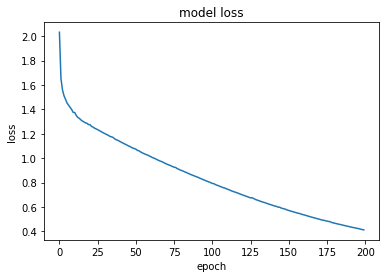

In [120]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [6]:
input_train_f = train_data.loc[:,['Filler', 'Temperature']]
scaler_input_f = preprocessing.StandardScaler()
X_train_f = scaler_input_f.fit_transform(input_train_f)

output_train_f = train_data.loc[:,['SatF']]
scaler_output_f = preprocessing.StandardScaler()
Y_train_f = scaler_output_f.fit_transform(output_train_f)

input_test_f = test_data.loc[:,['Filler', 'Temperature']]
X_test_f = scaler_input_f.transform(input_test_f)
output_test_f = test_data.loc[:,['SatF']]
Y_test_f = scaler_output_f.transform(output_test_f)

In [9]:
"""
ANN
"""

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

model_f = Sequential()
model_f.add(Dense(2000, input_shape=(2,), activation='relu'))
model_f.add(Dropout(0.1))
model_f.add(Dense(2000, activation='relu'))
model_f.add(Dropout(0.1))
model_f.add(Dense(2000, activation='relu'))
model_f.add(Dropout(0.1))
model_f.add(Dense(2000, activation='relu'))
model_f.add(Dropout(0.1))
model_f.add(Dense(1))

opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

model_f.compile(optimizer=opt,
             loss='mean_squared_error',
             metrics=['MSE'])

history_f=model_f.fit(X_train_f, Y_train_f, batch_size=32, epochs=200, verbose=1, callbacks=callback)

Epoch 1/200
32/32 [==============================] - 2s 56ms/step - loss: 0.2497 - MSE: 0.2497
Epoch 2/200
32/32 [==============================] - 2s 59ms/step - loss: 0.0355 - MSE: 0.0355
Epoch 3/200
32/32 [==============================] - 2s 60ms/step - loss: 0.0206 - MSE: 0.0206
Epoch 4/200
32/32 [==============================] - 2s 53ms/step - loss: 0.0114 - MSE: 0.0114
Epoch 5/200
32/32 [==============================] - 2s 57ms/step - loss: 0.0059 - MSE: 0.0059
Epoch 6/200
32/32 [==============================] - 2s 57ms/step - loss: 0.0043 - MSE: 0.0043
Epoch 7/200
32/32 [==============================] - 2s 57ms/step - loss: 0.0034 - MSE: 0.0034
Epoch 8/200
32/32 [==============================] - 2s 54ms/step - loss: 0.0041 - MSE: 0.0041
Epoch 9/200
32/32 [==============================] - 2s 54ms/step - loss: 0.0026 - MSE: 0.0026
Epoch 10/200
32/32 [==============================] - 2s 54ms/step - loss: 0.0022 - MSE: 0.0022
Epoch 11/200
32/32 [=============================

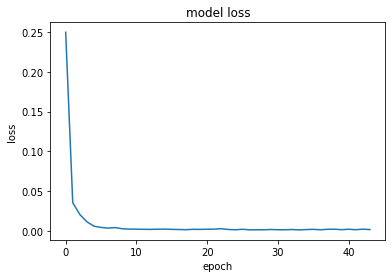

In [11]:
plt.plot(history_f.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [7]:
model_f = tf.keras.models.load_model(r'C:\Users\hamed\Desktop\Research\Paper\Code\ANN\After Fitting Polynomials\PC\model_f_PC.h5')

In [8]:
model = tf.keras.models.load_model(r'C:\Users\hamed\Desktop\Research\Paper\Code\ANN\After Fitting Polynomials\PC\model(4-6000-65).h5')

In [10]:
from sklearn.metrics import r2_score
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
pred_train_f = model_f.predict(X_train_f)
pred_test_f = model_f.predict(X_test_f)

RMSE_train = np.sqrt(mean_squared_error(scaler_output.inverse_transform(Y_train.reshape(-1,1)), scaler_output.inverse_transform(pred_train.reshape(-1,1))))
RMSE_test = np.sqrt(mean_squared_error(scaler_output.inverse_transform(Y_test.reshape(-1,1)), scaler_output.inverse_transform(pred_test.reshape(-1,1))))

RMSE_train_f = np.sqrt(mean_squared_error(Y_train_f, pred_train_f))
RMSE_test_f = np.sqrt(mean_squared_error(Y_test_f, pred_test_f))

print("RMSE for training data= ",RMSE_train)
print("RMSE for testing data= ",RMSE_test)
print("R2 for training data = ", r2_score(Y_train, pred_train))
print("R2 for testing data = ", r2_score(Y_test, pred_test))
print("RMSE for training data (failure model)= ",RMSE_train_f)
print("RMSE for testing data (failure model)= ",RMSE_test_f)

RMSE for training data=  0.9578690571518904
RMSE for testing data=  1.421086739991332
R2 for training data =  0.9987601604117734
R2 for testing data =  0.9965540484105996
RMSE for training data (failure model)=  0.033838428088286916
RMSE for testing data (failure model)=  0.08353082614240787


In [10]:
input_data = PC.loc[:,['Filler', 'Temperature', 'Strain']]
input_data_scaled = scaler_input.transform(input_data)
stress_scaled = model.predict(input_data_scaled)
stress_pred = pd.DataFrame(scaler_output.inverse_transform(stress_scaled))
stress_pred.columns=['Stress Predicted']
df = pd.concat([PC.reset_index(drop=True), stress_pred], axis=1)
df

,Material,Filler,Temperature,Strain,Stress,SatF,Stress Predicted
0,PC,0,23,0.000000,-0.526210,6.962,-0.954040
1,PC,0,23,0.142082,3.145843,6.962,3.070111
2,PC,0,23,0.284163,6.673660,6.962,6.725655
3,PC,0,23,0.426245,10.060049,6.962,10.132668
4,PC,0,23,0.568327,13.307819,6.962,13.311958
...,...,...,...,...,...,...,...
1495,PC,40,90,1.395918,77.352505,1.520,81.252228
1496,PC,40,90,1.426939,77.591526,1.520,81.980217
1497,PC,40,90,1.457959,77.766252,1.520,82.700233
1498,PC,40,90,1.488980,77.876681,1.520,83.412437


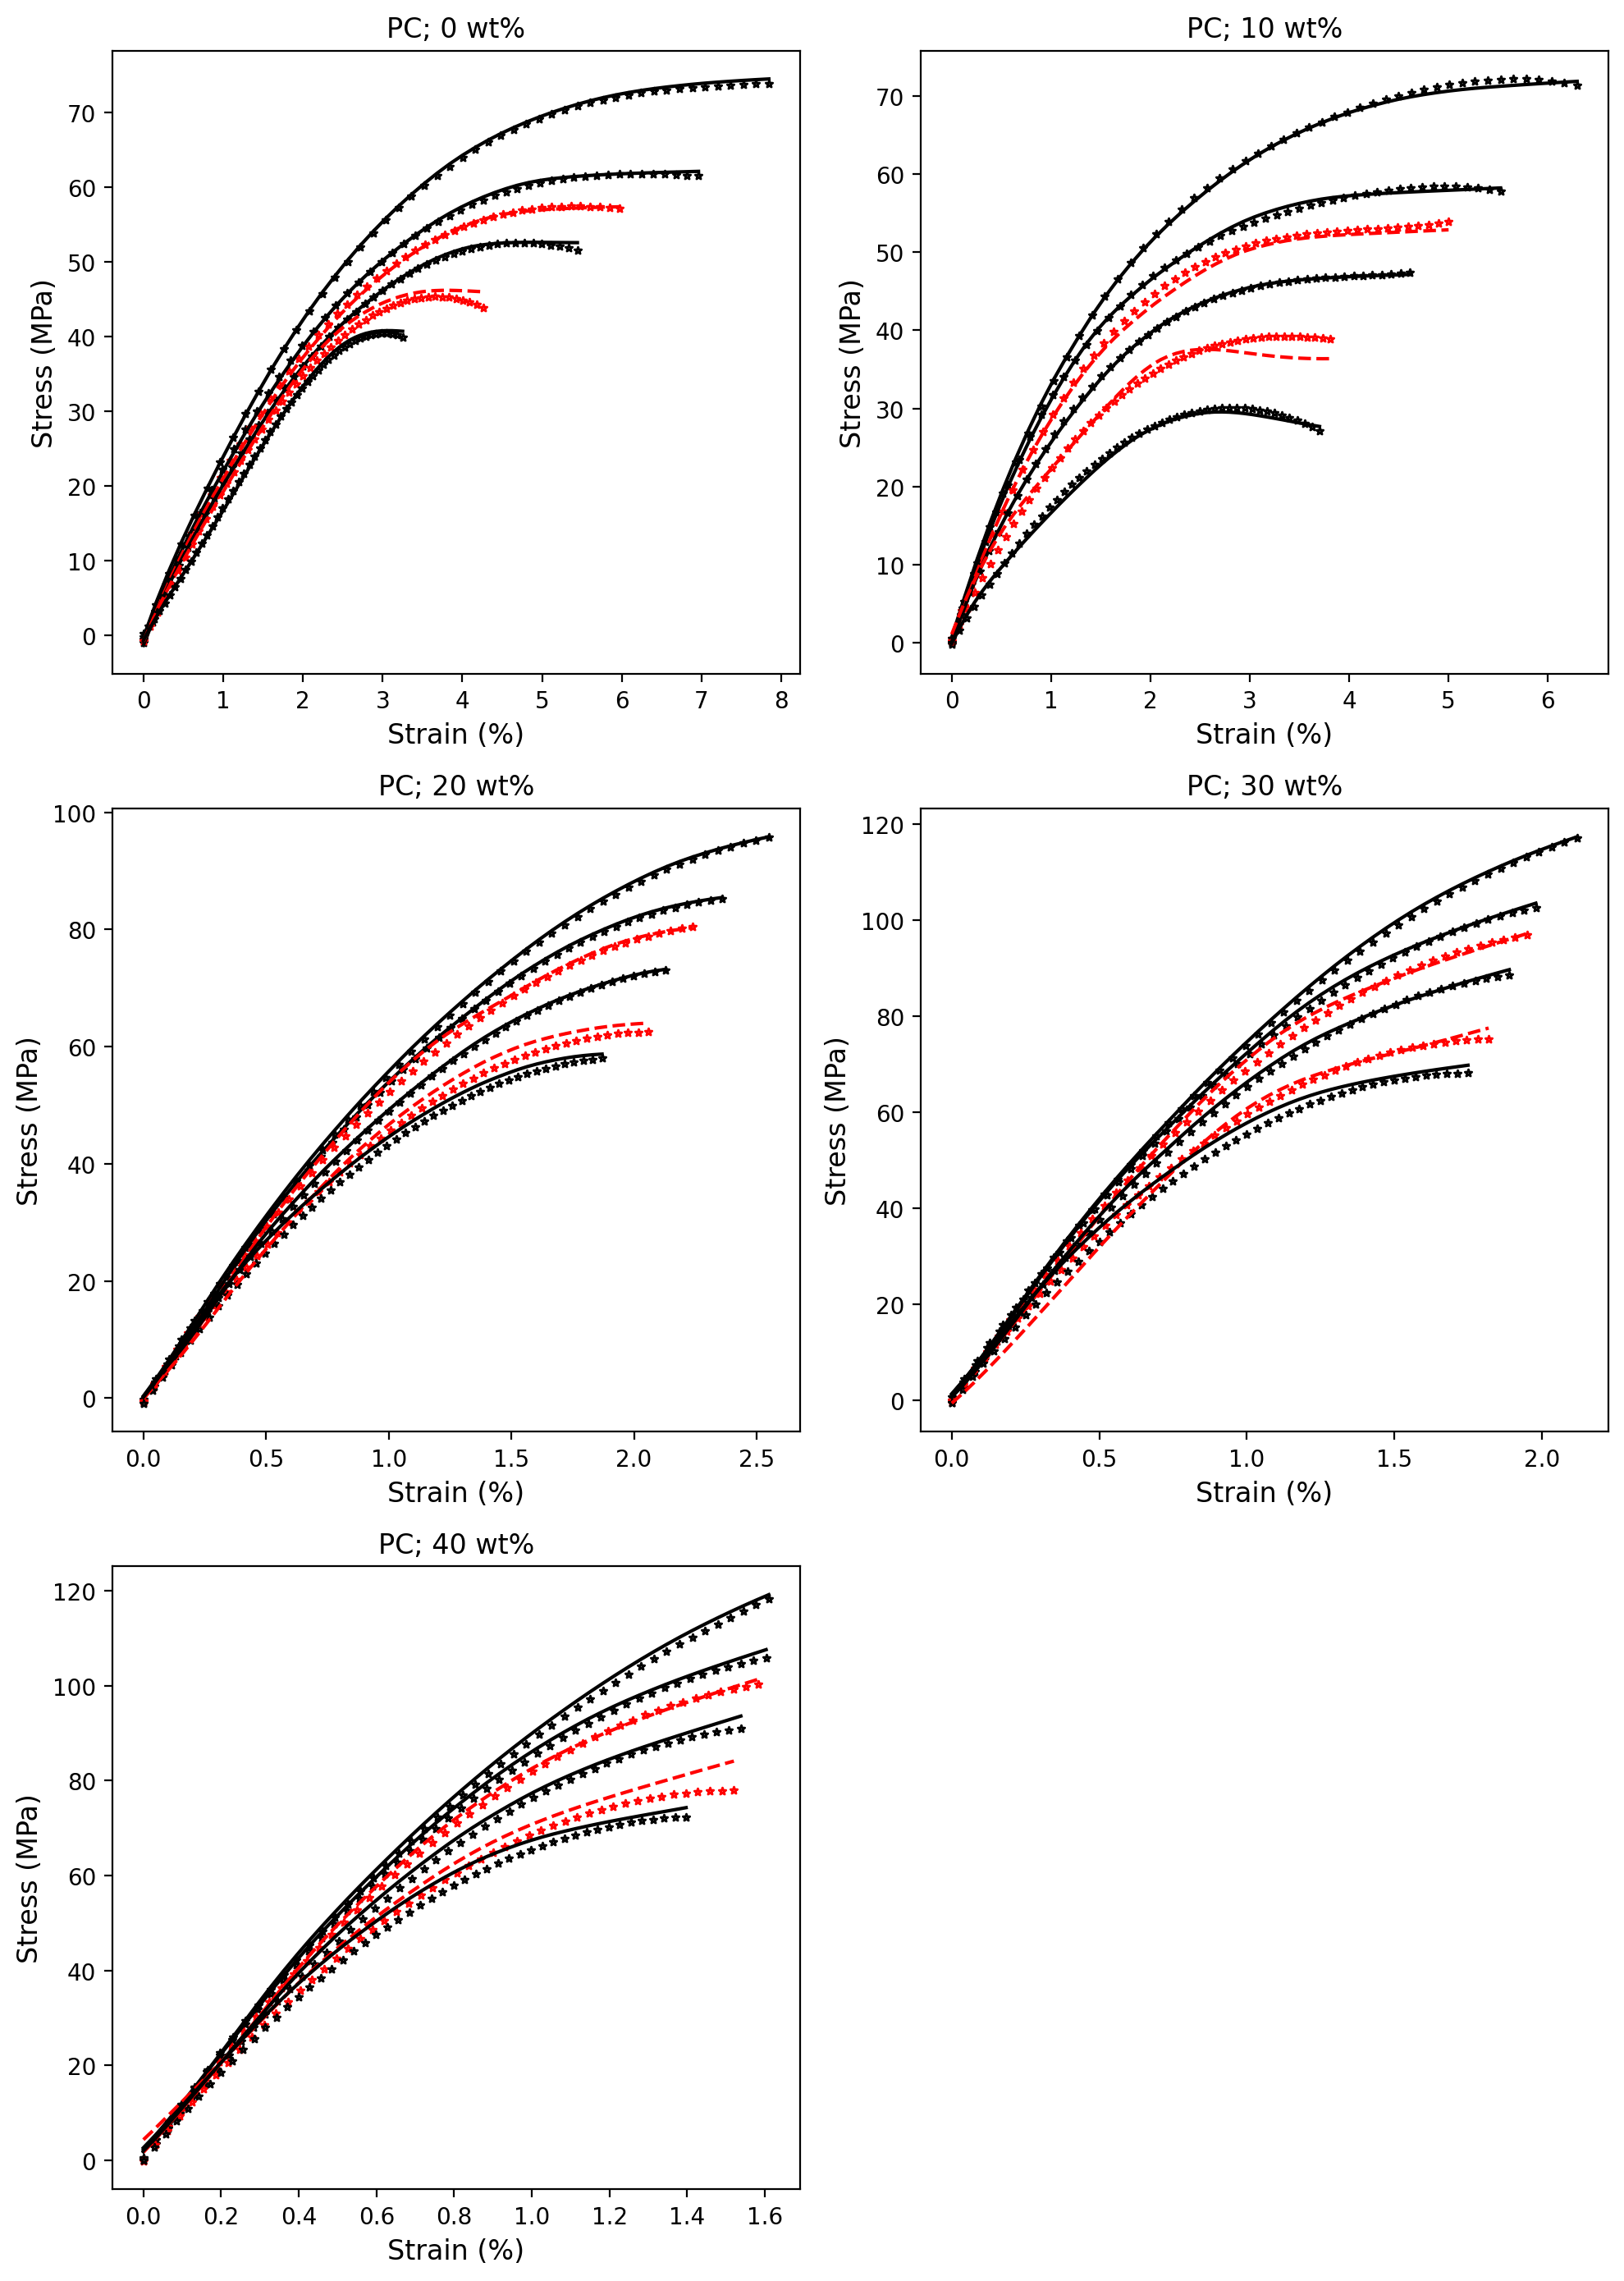

In [36]:
"""
Plots
"""

fig = plt.figure(figsize=(10,14), dpi=200)
i=0

for f in [0, 10, 20, 30, 40]:
    i=i+1
    plt.subplot(3,2,i)
    for t in [-20, 23, 40, 60, 90, 120]:
        if not df.loc[(df['Filler'] == f) & (df['Temperature'] == t)].empty:
            subset = df.loc[(df['Filler'] == f) & (df['Temperature'] == t)]
#             print(f, t, np.sqrt(mean_squared_error(subset.loc[:,'Stress Predicted'], subset.loc[:,'Stress'])))
            if (t==40 or t==90):
                plt.plot(subset.loc[:,'Strain'], subset.loc[:,'Stress Predicted'], 'r', linestyle='--')
                plt.scatter(subset.loc[:,'Strain'], subset.loc[:,'Stress'],  marker = '*', edgecolors = 'r', facecolors='w',
                           s=10)
            else:
                plt.plot(subset.loc[:,'Strain'], subset.loc[:,'Stress Predicted'], 'k')
                plt.scatter(subset.loc[:,'Strain'], subset.loc[:,'Stress'],  marker = '*', edgecolors = 'k', facecolors='w',
                           s=10)
            plt.title('PC; %s wt%%' % f, fontsize=12)
            plt.xlabel('Strain (%)', fontsize=12)
            plt.ylabel('Stress (MPa)', fontsize=12)
    

plt.tight_layout()        
plt.show()